<a href="https://colab.research.google.com/github/KorKanticha/SeniorProject/blob/main/fivefold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
drive.mount('/content/gdrive')
xls_Suicide = pd.ExcelFile("/content/gdrive/MyDrive/SeniorProject_KorBoss/Cleaned_Dummy8.xlsx")
df = dict()
df = pd.read_excel(xls_Suicide)


In [ ]:
#ตัด WTK, attemptToDie,AttemptHurtOthers
feature_cols = ['Gender_หญิง', 'Age', 'Province_Happen_11', 'Province_Happen_12', 'Province_Happen_13', 'Province_Happen_14', 'Province_Happen_15', 'Province_Happen_16', 'Province_Happen_17', 'Province_Happen_18', 'Province_Happen_19', 'Province_Happen_20', 'Province_Happen_21', 'Province_Happen_22', 'Province_Happen_23', 'Province_Happen_24', 'Province_Happen_25', 'Province_Happen_26', 'Province_Happen_27', 'Province_Happen_30', 'Province_Happen_31', 'Province_Happen_32', 'Province_Happen_33', 'Province_Happen_34', 'Province_Happen_35', 'Province_Happen_36', 'Province_Happen_37', 'Province_Happen_38', 'Province_Happen_39', 'Province_Happen_40', 'Province_Happen_41', 'Province_Happen_42', 'Province_Happen_43', 'Province_Happen_44', 'Province_Happen_45', 'Province_Happen_46', 'Province_Happen_47', 'Province_Happen_48', 'Province_Happen_49', 'Province_Happen_50', 'Province_Happen_51', 'Province_Happen_52', 'Province_Happen_53', 'Province_Happen_54', 'Province_Happen_55', 'Province_Happen_56', 'Province_Happen_57', 'Province_Happen_58', 'Province_Happen_60', 'Province_Happen_61', 'Province_Happen_62', 'Province_Happen_63', 'Province_Happen_64', 'Province_Happen_65', 'Province_Happen_66', 'Province_Happen_67', 'Province_Happen_70', 'Province_Happen_71', 'Province_Happen_72', 'Province_Happen_73', 'Province_Happen_74', 'Province_Happen_75', 'Province_Happen_76', 'Province_Happen_77', 'Province_Happen_80', 'Province_Happen_81', 'Province_Happen_82', 'Province_Happen_83', 'Province_Happen_84', 'Province_Happen_85', 'Province_Happen_86', 'Province_Happen_90', 'Province_Happen_91', 'Province_Happen_92', 'Province_Happen_93', 'Province_Happen_94', 'Province_Happen_95', 'Province_Happen_96', 'Province_Happen_ต่างประเทศ', 'Status_คู่', 'Status_สมณะ', 'Status_หม้าย', 'Status_หย่า', 'Status_แยก', 'Status_โสด', 'Religion_คริสต์', 'Religion_ซิกข์', 'Religion_บาไฮ', 'Religion_พุทธ', 'Religion_อิสลาม', 'Religion_ไม่นับถือศาสนา', 'Disease_M_Physcopath_1', 'Disease_M_Depression_1', 'Disease_M_Others_1', 'Disease_P_Diabetes_1', 'Disease_P_HBP_1', 'Disease_P_Cardio_1', 'Disease_P_Kidney_1', 'Disease_P_Liver_1', 'Disease_P_lung_1', 'Disease_P_Migrant_1', 'Disease_P_Joint_1', 'Disease_P_Paralyze_1', 'Disease_P_Cancer_1', 'Disease_P_HIV_1', 'Disease_P_Others_1', 'Time_Group_1', 'Time_Group_2', 'Time_Group_3', 'Time_Group_4', 'Time_Group_5', 'Time_Group_6', 'Month_Group_1', 'Month_Group_2', 'Month_Group_3', 'Month_Group_4', 'Attempt_Year', 'Attempt_Ever_0', 'Attempt_Ever_1', 'Attempt_Sign_0', 'Attempt_Sign_1', 'Factor_R_Neglected_1', 'Factor_R_Humuliated_1', 'Factor_R_Jeolous_1', 'Factor_R_Qurrel_1', 'Factor_R_Needy_1', 'Factor_R_Lost_1', 'Factor_R_Aging_Lonesome_1', 'Factor_R_Working_Environment_1', 'Factor_Alcoholic_0', 'Factor_Alcoholic_1', 'Factor_A_At_Sucide_Attempt_1', 'Factor_Drugs_0', 'Factor_Drugs_1', 'Factor_D_At_Sucide_Attempt_1', 'Factor_Di_Lonesone_0', 'Factor_Di_Lonesone_1', 'Factor_Di_Pain_0', 'Factor_Di_Pain_1', 'Factor_Economic_0', 'Factor_Economic_1', 'Factor_E_Poor_0', 'Factor_E_Poor_1', 'Factor_E_Unemployed_0', 'Factor_E_Unemployed_1', 'Factor_E_Dept_0', 'Factor_E_Dept_1', 'Factor_Others_1', 'Disease_P_Direct_COVID_1', 'Disease_P_COVID_1', 'Factor_C_Unemployed_0', 'Factor_C_Unemployed_1', 'Factor_C_Poor_0', 'Factor_C_Poor_1', 'Factor_C_Dept_0', 'Factor_C_Dept_1', 'Factor_C_Mental_0', 'Factor_C_Mental_1', 'Factor_C_Others_0', 'Factor_C_Others_1']
#feature_cols = ['Gender_หญิง', 'Age', 'Province_Happen_11', 'Province_Happen_12', 'Province_Happen_13', 'Province_Happen_14', 'Province_Happen_15', 'Province_Happen_16', 'Province_Happen_17', 'Province_Happen_18', 'Province_Happen_19', 'Province_Happen_20', 'Province_Happen_21', 'Province_Happen_22', 'Province_Happen_23', 'Province_Happen_24', 'Province_Happen_25', 'Province_Happen_26', 'Province_Happen_27', 'Province_Happen_30', 'Province_Happen_31', 'Province_Happen_32', 'Province_Happen_33', 'Province_Happen_34', 'Province_Happen_35', 'Province_Happen_36', 'Province_Happen_37', 'Province_Happen_38', 'Province_Happen_39', 'Province_Happen_40', 'Province_Happen_41', 'Province_Happen_42', 'Province_Happen_43', 'Province_Happen_44', 'Province_Happen_45', 'Province_Happen_46', 'Province_Happen_47', 'Province_Happen_48', 'Province_Happen_49', 'Province_Happen_50', 'Province_Happen_51', 'Province_Happen_52', 'Province_Happen_53', 'Province_Happen_54', 'Province_Happen_55', 'Province_Happen_56', 'Province_Happen_57', 'Province_Happen_58', 'Province_Happen_60', 'Province_Happen_61', 'Province_Happen_62', 'Province_Happen_63', 'Province_Happen_64', 'Province_Happen_65', 'Province_Happen_66', 'Province_Happen_67', 'Province_Happen_70', 'Province_Happen_71', 'Province_Happen_72', 'Province_Happen_73', 'Province_Happen_74', 'Province_Happen_75', 'Province_Happen_76', 'Province_Happen_77', 'Province_Happen_80', 'Province_Happen_81', 'Province_Happen_82', 'Province_Happen_83', 'Province_Happen_84', 'Province_Happen_85', 'Province_Happen_86', 'Province_Happen_90', 'Province_Happen_91', 'Province_Happen_92', 'Province_Happen_93', 'Province_Happen_94', 'Province_Happen_95', 'Province_Happen_96', 'Province_Happen_ต่างประเทศ', 'Status_คู่', 'Status_สมณะ', 'Status_หม้าย', 'Status_หย่า', 'Status_แยก', 'Status_โสด', 'Religion_คริสต์', 'Religion_ซิกข์', 'Religion_บาไฮ', 'Religion_พุทธ', 'Religion_อิสลาม', 'Religion_ไม่นับถือศาสนา', 'WTK_Overdose_1', 'WTK_Insecticide_1', 'WTK_Herbicide_1', 'WTK_Other_Chemicals_1', 'WTK_Sharp_Weapons_1', 'WTK_Guns_1', 'WTK_Jump_Off_Building_1', 'WTK_Hang_1', 'WTK_Jump_Into_Water_1', 'WTK_Ran_Into_Cars_1', 'WTK_Smoke_Gas_1', 'Disease_M_Physcopath_1', 'Disease_M_Depression_1', 'Disease_M_Others_1', 'Disease_P_Diabetes_1', 'Disease_P_HBP_1', 'Disease_P_Cardio_1', 'Disease_P_Kidney_1', 'Disease_P_Liver_1', 'Disease_P_lung_1', 'Disease_P_Migrant_1', 'Disease_P_Joint_1', 'Disease_P_Paralyze_1', 'Disease_P_Cancer_1', 'Disease_P_HIV_1', 'Disease_P_Others_1', 'Time_Group_1', 'Time_Group_2', 'Time_Group_3', 'Time_Group_4', 'Time_Group_5', 'Time_Group_6', 'Month_Group_1', 'Month_Group_2', 'Month_Group_3', 'Month_Group_4', 'Attempt_Year', 'Attempt_Hurt_Others_0', 'Attempt_Hurt_Others_1', 'Attempt_Ever_0', 'Attempt_Ever_1', 'Attempt_To_Die_0', 'Attempt_To_Die_1', 'Attempt_Sign_0', 'Attempt_Sign_1', 'Factor_R_Neglected_1', 'Factor_R_Humuliated_1', 'Factor_R_Jeolous_1', 'Factor_R_Qurrel_1', 'Factor_R_Needy_1', 'Factor_R_Lost_1', 'Factor_R_Aging_Lonesome_1', 'Factor_R_Working_Environment_1', 'Factor_Alcoholic_0', 'Factor_Alcoholic_1', 'Factor_A_At_Sucide_Attempt_1', 'Factor_Drugs_0', 'Factor_Drugs_1', 'Factor_D_At_Sucide_Attempt_1', 'Factor_Di_Lonesone_0', 'Factor_Di_Lonesone_1', 'Factor_Di_Pain_0', 'Factor_Di_Pain_1', 'Factor_Economic_0', 'Factor_Economic_1', 'Factor_E_Poor_0', 'Factor_E_Poor_1', 'Factor_E_Unemployed_0', 'Factor_E_Unemployed_1', 'Factor_E_Dept_0', 'Factor_E_Dept_1', 'Factor_Others_1', 'Disease_P_Direct_COVID_1', 'Disease_P_COVID_1', 'Factor_C_Unemployed_0', 'Factor_C_Unemployed_1', 'Factor_C_Poor_0', 'Factor_C_Poor_1', 'Factor_C_Dept_0', 'Factor_C_Dept_1', 'Factor_C_Mental_0', 'Factor_C_Mental_1', 'Factor_C_Others_0', 'Factor_C_Others_1']
X = df[feature_cols] # Features
y = df.Success # Target variable

X_trainandval, X_test, y_trainandval, y_test = train_test_split(X, y,
    test_size=0.2 , random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_trainandval, y_trainandval,
    test_size=0.25 , random_state = 1)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")




#SVM

## Base


TRAIN: [    0     1     2 ... 39788 39789 39790] VALID [    3     8    11 ... 39774 39776 39781]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


0.9581605729362985
[[5429  148]
 [ 185 2197]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      5577
         1.0       0.94      0.92      0.93      2382

    accuracy                           0.96      7959
   macro avg       0.95      0.95      0.95      7959
weighted avg       0.96      0.96      0.96      7959



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Test Result:
Accuracy Score: 95.82%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.967047     0.936887  0.958161     0.951967      0.958020
recall        0.973462     0.922334  0.958161     0.947898      0.958161
f1-score      0.970244     0.929554  0.958161     0.949899      0.958066
support    5577.000000  2382.000000  0.958161  7959.000000   7959.000000
_______________________________________________
Confusion Matrix: 
 [[5429  148]
 [ 185 2197]]



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Train Result:
Accuracy Score: 97.56%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.982013     0.960456  0.975591      0.971234      0.975572
recall         0.983200     0.957729  0.975591      0.970465      0.975591
f1-score       0.982606     0.959090  0.975591      0.970848      0.975581
support    22322.000000  9510.000000  0.975591  31832.000000  31832.000000
_______________________________________________
Confusion Matrix: 
 [[21947   375]
 [  402  9108]]

Confusion matrix

 [[5429  148]
 [ 185 2197]]

True Negatives(TN) =  5429

True Positives(TP) =  2197

False Positives(FP) =  148

False Negatives(FN) =  185
TRAIN: [    0     1     3 ... 39785 39788 39789] VALID [    2    10    21 ... 39786 39787 39790]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


0.953757225433526
[[5435  147]
 [ 221 2155]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      5582
         1.0       0.94      0.91      0.92      2376

    accuracy                           0.95      7958
   macro avg       0.95      0.94      0.94      7958
weighted avg       0.95      0.95      0.95      7958



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Test Result:
Accuracy Score: 95.38%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.960926     0.936142  0.953757     0.948534      0.953527
recall        0.973665     0.906987  0.953757     0.940326      0.953757
f1-score      0.967254     0.921334  0.953757     0.944294      0.953544
support    5582.000000  2376.000000  0.953757  7958.000000   7958.000000
_______________________________________________
Confusion Matrix: 
 [[5435  147]
 [ 221 2155]]



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Train Result:
Accuracy Score: 97.64%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.982806     0.961364  0.976408      0.972085      0.976397
recall         0.983555     0.959647  0.976408      0.971601      0.976408
f1-score       0.983181     0.960505  0.976408      0.971843      0.976402
support    22317.000000  9516.000000  0.976408  31833.000000  31833.000000
_______________________________________________
Confusion Matrix: 
 [[21950   367]
 [  384  9132]]

Confusion matrix

 [[5435  147]
 [ 221 2155]]

True Negatives(TN) =  5435

True Positives(TP) =  2155

False Positives(FP) =  147

False Negatives(FN) =  221
TRAIN: [    1     2     3 ... 39788 39789 39790] VALID [    0     4     5 ... 39782 39784 39785]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


0.9532545865795427
[[5426  144]
 [ 228 2160]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      5570
         1.0       0.94      0.90      0.92      2388

    accuracy                           0.95      7958
   macro avg       0.95      0.94      0.94      7958
weighted avg       0.95      0.95      0.95      7958



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Test Result:
Accuracy Score: 95.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.959675     0.937500  0.953255     0.948587      0.953021
recall        0.974147     0.904523  0.953255     0.939335      0.953255
f1-score      0.966857     0.920716  0.953255     0.943786      0.953011
support    5570.000000  2388.000000  0.953255  7958.000000   7958.000000
_______________________________________________
Confusion Matrix: 
 [[5426  144]
 [ 228 2160]]



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Train Result:
Accuracy Score: 97.55%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.981799     0.960511  0.975466      0.971155      0.975444
recall         0.983250     0.957176  0.975466      0.970213      0.975466
f1-score       0.982524     0.958841  0.975466      0.970683      0.975453
support    22329.000000  9504.000000  0.975466  31833.000000  31833.000000
_______________________________________________
Confusion Matrix: 
 [[21955   374]
 [  407  9097]]

Confusion matrix

 [[5426  144]
 [ 228 2160]]

True Negatives(TN) =  5426

True Positives(TP) =  2160

False Positives(FP) =  144

False Negatives(FN) =  228
TRAIN: [    0     2     3 ... 39787 39789 39790] VALID [    1    31    50 ... 39766 39768 39788]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


0.9590349334003518
[[5473  125]
 [ 201 2159]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      5598
         1.0       0.95      0.91      0.93      2360

    accuracy                           0.96      7958
   macro avg       0.95      0.95      0.95      7958
weighted avg       0.96      0.96      0.96      7958



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Test Result:
Accuracy Score: 95.90%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.964575     0.945271  0.959035     0.954923      0.958851
recall        0.977671     0.914831  0.959035     0.946251      0.959035
f1-score      0.971079     0.929802  0.959035     0.950440      0.958838
support    5598.000000  2360.000000  0.959035  7958.000000   7958.000000
_______________________________________________
Confusion Matrix: 
 [[5473  125]
 [ 201 2159]]



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Train Result:
Accuracy Score: 97.49%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.982108     0.958040    0.9749      0.970074      0.974901
recall         0.982064     0.958141    0.9749      0.970102      0.974900
f1-score       0.982086     0.958091    0.9749      0.970088      0.974901
support    22301.000000  9532.000000    0.9749  31833.000000  31833.000000
_______________________________________________
Confusion Matrix: 
 [[21901   400]
 [  399  9133]]

Confusion matrix

 [[5473  125]
 [ 201 2159]]

True Negatives(TN) =  5473

True Positives(TP) =  2159

False Positives(FP) =  125

False Negatives(FN) =  201
TRAIN: [    0     1     2 ... 39787 39788 39790] VALID [    9    14    15 ... 39779 39783 39789]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


0.9517466700175924
[[5419  153]
 [ 231 2155]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      5572
         1.0       0.93      0.90      0.92      2386

    accuracy                           0.95      7958
   macro avg       0.95      0.94      0.94      7958
weighted avg       0.95      0.95      0.95      7958



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Test Result:
Accuracy Score: 95.17%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.959115     0.933709  0.951747     0.946412      0.951498
recall        0.972541     0.903185  0.951747     0.937863      0.951747
f1-score      0.965782     0.918193  0.951747     0.941987      0.951513
support    5572.000000  2386.000000  0.951747  7958.000000   7958.000000
_______________________________________________
Confusion Matrix: 
 [[5419  153]
 [ 231 2155]]



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Train Result:
Accuracy Score: 97.67%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.982778     0.962334  0.976691      0.972556      0.976673
recall         0.984010     0.959499  0.976691      0.971755      0.976691
f1-score       0.983394     0.960914  0.976691      0.972154      0.976681
support    22327.000000  9506.000000  0.976691  31833.000000  31833.000000
_______________________________________________
Confusion Matrix: 
 [[21970   357]
 [  385  9121]]

Confusion matrix

 [[5419  153]
 [ 231 2155]]

True Negatives(TN) =  5419

True Positives(TP) =  2155

False Positives(FP) =  153

False Negatives(FN) =  231


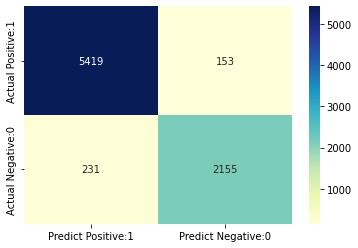

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy

from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.metrics import accuracy_score

# ใช้ Kfold ต้องแปลงเป็น numpy
X = df[feature_cols].values # Features
y = df['Success'].values # Target variable

# Split dataset into training set and test set
# แบ่งเป็นคแ่ trainandval & test
X_trainandval, X_test, y_trainandval, y_test = train_test_split(X, y,
    test_size=0.2 , random_state = 1)

#แบ่ง trainandval เป็น train, valid 5แบบ แล้วรันโมเดล
kf = KFold(n_splits=5, shuffle = True, random_state=1)
kf.get_n_splits(X_trainandval)
svc=SVC() 
for train_index, valid_index in kf.split(X_trainandval):
  print("TRAIN:", train_index, "VALID", valid_index)
  X_train, X_val = X_trainandval[train_index], X_trainandval[valid_index]
  y_train, y_val = y_trainandval[train_index], y_trainandval[valid_index]
  
  svc.fit(scaler.transform(X_train),y_train)
  y_predval = svc.predict(scaler.transform(X_val))
  print(svc.score(scaler.transform(X_val),y_val))
  print(confusion_matrix(y_val, y_predval))
  print(classification_report(y_val,y_predval))

  print_score(svc,scaler.transform(X_train), y_train, scaler.transform(X_val), y_val, train=False)
  print_score(svc, scaler.transform(X_train), y_train,scaler.transform(X_val), y_val, train=True)
############################################
  cm = confusion_matrix(y_val, y_predval)
  print('Confusion matrix\n\n', cm)
  print('\nTrue Negatives(TN) = ', cm[0,0])
  print('\nTrue Positives(TP) = ', cm[1,1])
  print('\nFalse Positives(FP) = ', cm[0,1])
  print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Positive:1', 'Predict Negative:0'], 
                                 index=['Actual Positive:1', 'Actual Negative:0'])
sns_heatmap_svm_base = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2 , random_state = 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


svc_linear=SVC(kernel='linear') 


C = [0.001,0.1,1,10, 100]

param_grid = dict(C=C)

svc_linear = GridSearchCV(estimator=svc_linear, param_grid=param_grid, scoring='recall',
                    verbose=1, n_jobs=-1, cv=5)
svc_linear.fit(scaler.transform(X_train), y_train)
best_params = svc_linear.best_params_
total_result = svc_linear.cv_results_
print(f"Best parameters: {best_params}")
print(f"Total Result: {total_result}")

svc_linear = SVC(kernel='linear', **best_params)
svc_linear.fit(scaler.transform(X_train), y_train)

print_score(svc_linear, scaler.transform(X_train), y_train, scaler.transform(X_test), y_test, train=True)
print_score(svc_linear, scaler.transform(X_train), y_train, scaler.transform(X_test), y_test, train=False)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


## Linear Kernel

In [ ]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
svc_linear=SVC(kernel='linear') 


# ใช้ Kfold ต้องแปลงเป็น numpy
X = df[feature_cols].values # Features
y = df['Success'].values # Target variable

# Split dataset into training set and test set
# แบ่งเป็นคแ่ trainandval & test
X_trainandval, X_test, y_trainandval, y_test = train_test_split(X, y,
    test_size=0.2 , random_state = 1)

#แบ่ง trainandval เป็น train, valid 5แบบ แล้วรันโมเดล
kf = KFold(n_splits=5, shuffle = True, random_state=1)
kf.get_n_splits(X_trainandval)
svc=SVC() 
for train_index, valid_index in kf.split(X_trainandval):
  print("TRAIN:", train_index, "VALID", valid_index)
  X_train, X_val = X_trainandval[train_index], X_trainandval[valid_index]
  y_train, y_val = y_trainandval[train_index], y_trainandval[valid_index]
  svc_linear.fit(scaler.transform(X_train),y_train)
  y_predval = svc_linear.predict(scaler.transform(X_val))
  print(svc_linear.score(scaler.transform(X_val),y_val))
  print(confusion_matrix(y_val, y_predval))
  print(classification_report(y_val,y_predval))
############################################
  cm = confusion_matrix(y_val, y_predval)
  print('Confusion matrix\n\n', cm)
  print('\nTrue Negatives(TN) = ', cm[0,0])
  print('\nTrue Positives(TP) = ', cm[1,1])
  print('\nFalse Positives(FP) = ', cm[0,1])
  print('\nFalse Negatives(FN) = ', cm[1,0])


import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Positive:0', 'Predict Negative:1'], 
                                 index=['Actual Positive:0', 'Actual Negative:1'])
sns_heatmap_svm_base = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


#Decision Tree


In [ ]:
from sklearn.model_selection import KFold
import seaborn as sns

# ใช้ Kfold ต้องแปลงเป็น numpy
X = df[feature_cols].values # Features
y = df['Success'].values # Target variable

# Split dataset into training set and test set
# แบ่งเป็นคแ่ trainandval & test
X_trainandval, X_test, y_trainandval, y_test = train_test_split(X, y,
    test_size=0.2 , random_state = 1)

#แบ่ง trainandval เป็น train, valid 5แบบ แล้วรันโมเดล
kf = KFold(n_splits=5, shuffle = True, random_state=1)
kf.get_n_splits(X_trainandval)

for train_index, valid_index in kf.split(X_trainandval):
  print("TRAIN:", train_index, "VALID", valid_index)
  X_train, X_val = X_trainandval[train_index], X_trainandval[valid_index]
  y_train, y_val = y_trainandval[train_index], y_trainandval[valid_index]

# Create Decision Tree classifer object
  clf = DecisionTreeClassifier(criterion='entropy', max_depth=48)

# Train Decision Tree Classifer
  clf = clf.fit(X_train,y_train)

  y_predval = clf.predict(X_val)

  cm = confusion_matrix(y_val, y_predval)
  print('Confusion matrix\n\n', cm)
  print('\nTrue Negatives(TN) = ', cm[0,0])
  print('\nTrue Positives(TP) = ', cm[1,1])
  print('\nFalse Positives(FP) = ', cm[0,1])
  print('\nFalse Negatives(FN) = ', cm[1,0])

  cm_matrix = pd.DataFrame(data=cm, columns=['Predict Positive:0', 'Predict Negative:1'], 
                                 index=['Actual Positive:0', 'Actual Negative:1'])
  sns_heatmap_svm_base = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
  print(classification_report(y_val,y_predval))
  print_score(clf, X_train, y_train, X_val, y_val, train=False)
  print_score(clf, X_train, y_train, X_val, y_val, train=True)


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
# create dataset
X = df[feature_cols] # Features
y = df.Success # Target variable

X_trainandval, X_test, y_trainandval, y_test = train_test_split(X, y,
    test_size=0.2 , random_state = 1)

x_train,x_val,y_train,y_val = train_test_split(X_trainandval,y_trainandval,test_size=0.25,random_state=0)
depth = []
for i in range(3,60):
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_trainandval, y=y_trainandval, cv=5,scoring='recall')
    depth.append((i,scores.mean()))
print(depth)


from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3,60)}
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), parameters, scoring='recall',
                   verbose=1, n_jobs=-1, cv=5)
clf.fit(X_trainandval, y_trainandval)
tree_model = clf.best_estimator_
best_params = clf.best_params_
total_result = clf.cv_results_

print(f"Best parameters: {best_params}")
print(f"Total Result: {total_result}")
print (clf.best_score_, clf.best_params_) 



# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = DecisionTreeClassifier(criterion='entropy')
# evaluate model
scores = cross_val_score(model, X_trainandval, y_trainandval, scoring='recall', cv=5)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))